In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

センサは下図のような配置で前腕にしっかりと固着させる。
<center><figure>
    <img src="DSC_0628.JPG" width="300">
    <figcaption>図１．センサの取り付け</figcaption>
</figure></center>

In [2]:
df = pd.read_csv('0711TSND121-14011733_2019-07-11_163719.055.csv',
                 names=['item', 'time', 'a_x', 'a_y', 'a_z', 'u_x', 'u_y','u_z'])

In [4]:
df.head()

,item,time,a_x,a_y,a_z,u_x,u_y,u_z
0,ags,59839169,328,-10364,-433,131,255,15
1,ags,59839170,365,-10398,-411,143,249,27
2,ags,59839171,360,-10364,-543,143,242,27
3,ags,59839172,377,-10381,-538,156,255,15
4,ags,59839173,377,-10373,-436,156,261,15


In [5]:
df.tail()

,item,time,a_x,a_y,a_z,u_x,u_y,u_z
202906,ags,60042075,1493,-10249,-326,545,-805,-309
202907,ags,60042076,1510,-10232,-365,539,-830,-309
202908,ags,60042077,1512,-10276,-348,539,-866,-315
202909,ags,60042078,1527,-10332,-324,545,-885,-339
202910,ags,60042079,1537,-10256,-250,539,-897,-345


In [6]:
len(df)

202911

In [135]:
a_x = np.array(df['a_x'])/10000
a_y = np.array(df['a_y'])/10000
a_z = np.array(df['a_z'])/10000

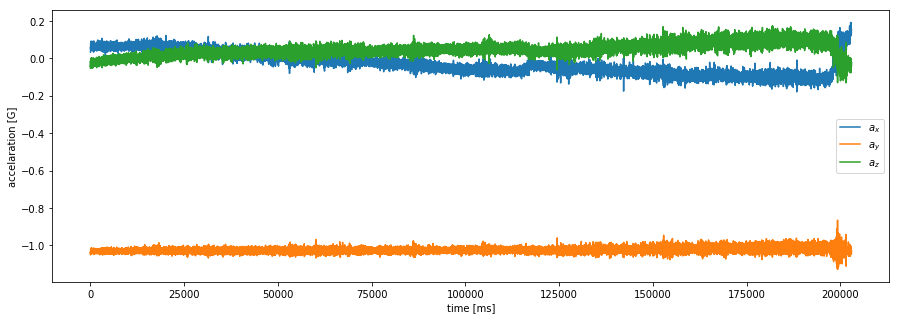

In [136]:
plt.figure(figsize=(15,5))
plt.plot(a_x)
plt.plot(a_y)
plt.plot(a_z)
plt.xlabel('time [ms]')
plt.ylabel('accelaration [G]')
plt.legend(['$a_x$','$a_y$','$a_z$'])

In [137]:
def arr2power(arr, ini=0):
    len_of_arr = len(arr)
    return arr[ini:2**(len(format(len_of_arr, 'b'))-1)]

In [138]:
def hz_vector(arr):
    l = len(arr)
    return 1000 * np.arange(l)/l

In [139]:
arr2power(a_y)

array([-1.0364, -1.0398, -1.0364, ..., -1.0315, -1.0227, -1.019 ])

In [154]:
F_a_y = np.fft.fft(arr2power(a_y))/len(arr2power(a_y))

In [155]:
hz_vector(F_a_y)

array([0.00000000e+00, 7.62939453e-03, 1.52587891e-02, ...,
       9.99977112e+02, 9.99984741e+02, 9.99992371e+02])

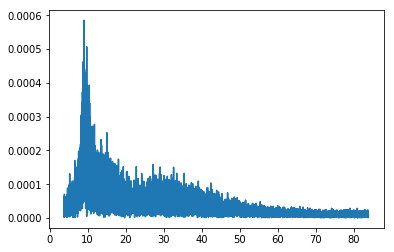

In [157]:
plt.plot(hz_vector(F_a_y)[500:11000], np.abs(F_a_y[500:11000]))

In [158]:
F_a_z = np.fft.fft(arr2power(a_z))/len(arr2power(a_z))

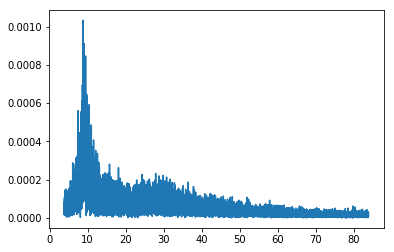

In [159]:
plt.plot(hz_vector(F_a_z)[500:11000], np.abs(F_a_z[500:11000]))

In [152]:
F_a_x = np.fft.fft(arr2power(a_x))/len(arr2power(a_x))

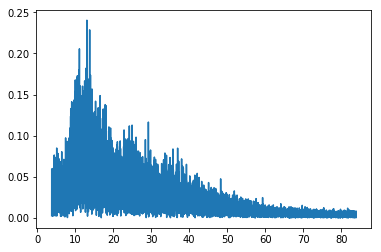

In [160]:
plt.plot(hz_vector(F_a_x)[500:11000], np.abs(F_a_x[500:11000]))